In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
from autodiff.engine import Scalar
from autodiff.nn import MLP

In [4]:
# 500 2-dimensional features (x, y)
X = np.random.uniform(-5, 5, (500, 2))

# nonlinear relationship: z = sin(x) + cos(y) + gaussian noise
y = np.sin(X[:, 0]) + np.cos(X[:, 1]) + np.random.randn(500) * 0.1

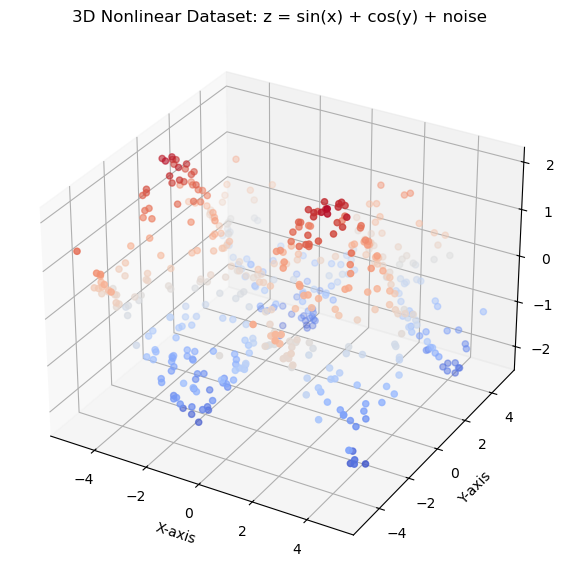

In [5]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Nonlinear Dataset: z = sin(x) + cos(y) + noise')

plt.show()

In [6]:
model = MLP(2, [15, 15, 1], ['relu', 'relu', 'linear'])

In [7]:
def mean_squared_error_loss(batch_size=None):
    if batch_size is None:
        X_batch, y_batch = X, y
    else:
        batch_indices = np.random.permutation(X.shape[0])[:batch_size]
        X_batch, y_batch = X[batch_indices], y[batch_indices]

    # batch data points
    inputs = [list(map(Scalar, point)) for point in X_batch]

    # forward pass
    outputs = list(map(model, inputs))

    # mean squared error loss
    losses = [(output_i - y_i) ** 2 for output_i, y_i in zip(outputs, y_batch)]
    total_loss = sum(losses) * (1.0 / len(losses))

    # L2 (Ridge) regularization
    alpha = 1e-4
    reg_penalty = alpha * sum((p * p for p in model.parameters()))
    batch_loss = total_loss + reg_penalty

    return batch_loss

In [8]:
# minibatch stochastic gradient descent
for i in range(1000):
    loss = mean_squared_error_loss(200)

    # backward propagation
    model.zero_grad()
    loss.backward()

    # exponential decay
    initial_lr = 0.01
    decay_rate = 0.99
    learning_rate = initial_lr * (decay_rate ** (i // 100))
    
    for p in model.parameters():
        p.value -= learning_rate * p.grad

    if i % 10 == 0:
        print(f"Step {i}, Loss: {loss.value}")

Step 0, Loss: 15.921489609048445
Step 10, Loss: 0.6962700144375965
Step 20, Loss: 0.6792695516506371
Step 30, Loss: 0.5767730881916463
Step 40, Loss: 0.5624414089825719
Step 50, Loss: 0.5735284180029536
Step 60, Loss: 0.558397731845168
Step 70, Loss: 0.5268188963201779
Step 80, Loss: 0.464034402554618
Step 90, Loss: 0.5328011831948309
Step 100, Loss: 0.5920391243659464
Step 110, Loss: 0.5143395036751439
Step 120, Loss: 0.4401084676310341
Step 130, Loss: 0.4449060529550508
Step 140, Loss: 0.47563201336235766
Step 150, Loss: 0.39515129163778806
Step 160, Loss: 0.458630009598177
Step 170, Loss: 0.4065295098691737
Step 180, Loss: 0.38132366504501375
Step 190, Loss: 0.43037441638555185
Step 200, Loss: 0.3905192077351114
Step 210, Loss: 0.3433059536142121
Step 220, Loss: 0.36431005737659955
Step 230, Loss: 0.3643687623611961
Step 240, Loss: 0.36729746093628746
Step 250, Loss: 0.33778583249771416
Step 260, Loss: 0.32371260982619454
Step 270, Loss: 0.34921818408336985
Step 280, Loss: 0.3258636

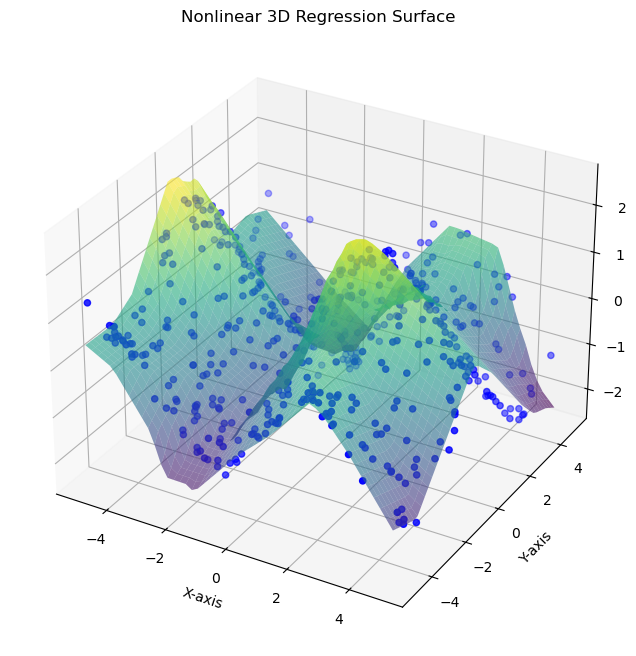

In [9]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 50))

zz = np.array([model([Scalar(xi), Scalar(yi)]).value for xi, yi in zip(np.ravel(xx), np.ravel(yy))])
zz = zz.reshape(xx.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Data Points')

ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.6)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('Nonlinear 3D Regression Surface')

plt.show()